### Brooklyn, Bronx, Manhattan, Staten Island 지역의 SAT 점수를 검정 하자.
- (1) 평균 수학 점수
- (2) 평균 reading 점수
- (3) 평균 writing 점수
- (4) Total score 

간에 차이가 없는지를 검정하라.

- Permutation test

여기서 Total score = Average math score + Average reading score + Average writing score 이다.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

random_generator = np.random.RandomState(42)

### 1. 데이터를 로드합니다.

In [3]:
pd.options.display.max_columns=None

scores = pd.read_csv('./inputs/scores.csv')
scores.head(3)

,School ID,School Name,Borough,Building Code,Street Address,City,State,Zip Code,Latitude,Longitude,Phone Number,Start Time,End Time,Student Enrollment,Percent White,Percent Black,Percent Hispanic,Percent Asian,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing),Percent Tested
0,02M260,Clinton School Writers and Artists,Manhattan,M933,425 West 33rd Street,Manhattan,NY,10001,40.75321,-73.99786,212-695-9114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06M211,Inwood Early College for Health and Informatio...,Manhattan,M052,650 Academy Street,Manhattan,NY,10002,40.86605,-73.92486,718-935-3660,8:30 AM,3:00 PM,87.0,3.4%,21.8%,67.8%,4.6%,NaN,NaN,NaN,NaN
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,M022,111 Columbia Street,Manhattan,NY,10002,40.71873,-73.97943,212-677-5190,8:15 AM,4:00 PM,1735.0,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,91.0%


### 2. 필요한 데이터 전처리를 진행합니다.

Shape 살펴봅니다.

In [4]:
scores.shape

(435, 22)

필요한 컬럼만 추출합니다.

In [5]:
datasets = scores[['School Name', 'City', 'Average Score (SAT Math)', 'Average Score (SAT Reading)', 'Average Score (SAT Writing)']]
datasets.head()

,School Name,City,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing)
0,Clinton School Writers and Artists,Manhattan,NaN,NaN,NaN
1,Inwood Early College for Health and Informatio...,Manhattan,NaN,NaN,NaN
2,"New Explorations into Science, Technology and ...",Manhattan,657.0,601.0,601.0
3,Essex Street Academy,Manhattan,395.0,411.0,387.0
4,Lower Manhattan Arts Academy,Manhattan,418.0,428.0,415.0


NaN 값 제거하기 위해 먼저, NaN 유무를 확인합니다.

In [6]:
datasets.describe()

,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing)
count,375.000000,375.000000,375.000000
mean,432.944000,424.504000,418.458667
std,71.952373,61.881069,64.548599
min,317.000000,302.000000,284.000000
25%,386.000000,386.000000,382.000000
50%,415.000000,413.000000,403.000000
75%,458.500000,445.000000,437.500000
max,754.000000,697.000000,693.000000


NaN 값을 제거 합니다.

In [7]:
datasets.dropna(inplace=True)

In [8]:
datasets.head()

,School Name,City,Average Score (SAT Math),Average Score (SAT Reading),Average Score (SAT Writing)
2,"New Explorations into Science, Technology and ...",Manhattan,657.0,601.0,601.0
3,Essex Street Academy,Manhattan,395.0,411.0,387.0
4,Lower Manhattan Arts Academy,Manhattan,418.0,428.0,415.0
5,High School for Dual Language and Asian Studies,Manhattan,613.0,453.0,463.0
6,Henry Street School for International Studies,Manhattan,410.0,406.0,381.0


컬럼의 이름이 복잡하므로 이름을 변경합니다.

In [9]:
datasets = datasets.rename(columns={'Average Score (SAT Math)': 'Math', 
                                    'Average Score (SAT Reading)': 'Reading', 
                                    'Average Score (SAT Writing)': 'Writing'})

In [10]:
datasets.head()

,School Name,City,Math,Reading,Writing
2,"New Explorations into Science, Technology and ...",Manhattan,657.0,601.0,601.0
3,Essex Street Academy,Manhattan,395.0,411.0,387.0
4,Lower Manhattan Arts Academy,Manhattan,418.0,428.0,415.0
5,High School for Dual Language and Asian Studies,Manhattan,613.0,453.0,463.0
6,Henry Street School for International Studies,Manhattan,410.0,406.0,381.0


도시의 개수를 확인합니다.

In [11]:
datasets.City.value_counts()

Brooklyn               109
Bronx                   98
Manhattan               89
Jamaica                 12
Long Island City        12
Staten Island           10
Flushing                 6
Astoria                  5
Rockaway Park            4
Elmhurst                 4
Springfield Gardens      4
Fresh Meadows            3
Far Rockaway             3
Ozone Park               3
Cambria Heights          2
Forest Hills             2
Saint Albans             1
Bayside                  1
Queens Village           1
Ridgewood                1
Oakland Gardens          1
Richmond Hill            1
Bellerose                1
Hollis                   1
Corona                   1
Name: City, dtype: int64

In [12]:
datasets = datasets[datasets.City.isin(['Brooklyn', 'Bronx', 'Manhattan', 'Staten Island'])]

In [13]:
datasets.shape

(306, 5)

### 3. Math에 대하여 Permutation test를 진행합니다.

In [14]:
math_means = datasets[['City', 'Math']].groupby('City').agg({'Math': np.mean})
math_means = math_means.reset_index()

In [15]:
math_means

,City,Math
0,Bronx,404.357143
1,Brooklyn,416.403670
2,Manhattan,455.887640
3,Staten Island,486.200000


visualization

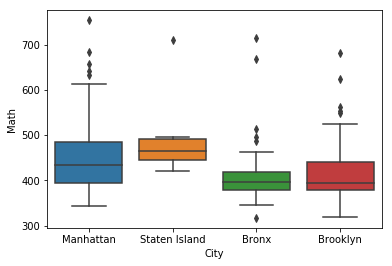

In [16]:
sns.boxplot(x='City', y='Math', data=datasets)

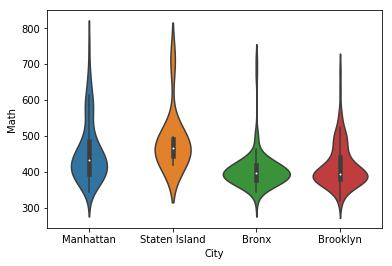

In [17]:
sns.violinplot(x='City', y='Math', data=datasets)

관측값으로부터 나온 관측값들의 표본 평균에 대한 분산을 구합니다.

In [19]:
var = math_means.Math.var()
var

1404.0095885488336

Permuation test를 진행합니다.

In [20]:
perm_means = []
perm_vars = []

math_values = datasets['Math'].values

for _ in range(30000):    
    math_values_copy = math_values.copy()
    random_generator.shuffle(math_values_copy)
    
    # Brooklyn : 109, Bronx : 98, Manhattan : 89, Staten Island : 10
    brooklyn = math_values_copy[:109]
    bronx = math_values_copy[109:207]
    manhattan = math_values_copy[207:296]
    state_island = math_values_copy[296:306]
    
    # 각 도시의 수학점수 평균들을 모은후에 분산을 구하고 저장한다.
    # Anova permutaion test를 적용하기 위해서는 자유도가 n-1이다.
    perm_vars.append(np.var([brooklyn.mean(), bronx.mean(), manhattan.mean(), state_island.mean()], ddof=1))

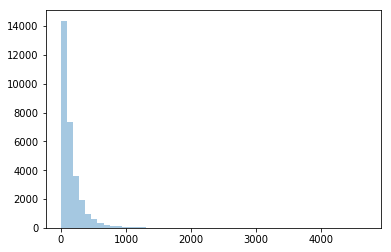

In [21]:
sns.distplot(perm_vars, kde=False)

In [22]:
# p value의 추정치를 구하자.
print('관찰된 변동: ', var)

perm_vars = np.array(perm_vars)
sum(perm_vars > var) / len(perm_vars)

관찰된 변동:  1404.0095885488336


0.003

#### Reading, writing, total score에 대해서 구해봅니다.